# 1. About the Context

## 1.1 About the Business
- Superstore is a chain of supermarkets owned by Canadian food retailing giant Loblaw Companies.
- The stores carry a variety of goods, but the vast majority of space is devoted to groceries, and about a third of each store is set aside for electronics, housewares, and clothing.

## 1.2 About the Audience
- Data Leader: Have knowledge about business beside Data literacy is at a high level.
- HR Manager: Have high level in Business Expertise however Data literacy is at a lower level.

# 2.**About the Problem**

## 2.1 Problem Understanding
- The Marketing Department wants to run a marketing campaigns during Chrismas and New Year holidays to thank customers for their past support of company. In addition, potential customers can be upgraded to become loyal customers.
- The Marketing Director proposed a plan to run RFM Model in Python to segment customers and then launch appropriate marketing campaigns.
- Recommendation for Marketing and Sales Team: With the company's retail model, which of three indicators R,F,M shoulde be given the most attention?

## 2.2 Problem breaking down
- Using RFM Model to launch marketing campain to thank customers.
  - RFM Model
    - Recency (R): How recently a customer made a purchase. Customers who made purchases more recently are typically more engaged and likely to buy again.
    - Frequency (F): How often a customer makes purchases within a given period. Frequent buyers are usually more loyal and valuable to a business.
    - Monetary (M): How much money a customer spends in total. High spenders contribute significantly to revenue and can be prioritized for premium services or offers.
  - Run thank you campaigns for customers with the highest spending and high frequency segments
  - Run campaigns that are relevant to each customer segment
- Using RFM Model to explore potential loyal customer become loyal customer
  - Loyal customers
  - Potential Loyal customers -> Loyal customer
- Suggestions to Mareting and Sales Team with the company's retail model, which of three R,F and M should be most interested in?

# 3.**Outline**

## Import Packages

In [ ]:
!pip install squarify


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify as sq
import warnings
warnings.filterwarnings('ignore')

## 3.1 Understand about data

### Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
Path = 'drive/MyDrive/Final_RFM'

In [ ]:
e_retail = pd.read_excel(Path + '/ecommerce retail.xlsx',sheet_name= 'ecommerce retail')
Segmentation = pd.read_excel(Path + '/ecommerce retail.xlsx',sheet_name= 'Segmentation')
Final_project_guidelines = pd.read_excel(Path + '/Final_project_guidelines.xlsx',sheet_name= 'Context')

## 3.2 EDA

### Get info about data type & data value

In [ ]:
e_retail.info()
e_retail.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
e_retail.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
e_retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


1. Detect cột những cột data value bất thường

- Data value của Quantity < 0

In [ ]:
e_retail[e_retail['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
e_retail['Cancel_list'] = e_retail['InvoiceNo'].apply(lambda x: True if str(x)[0] == 'C' else False)
e_retail[(e_retail['Quantity']<0) & (e_retail['Cancel_list'] == True)].head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,True
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,True
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,True
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom,True
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,True
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom,True


In [ ]:
e_retail[(e_retail['Quantity']<0) & (e_retail['Cancel_list'] == False)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom,False
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom,False
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,False
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom,False
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom,False
7192,537000,21414,NaN,-22,2010-12-03 15:32:00,0.0,NaN,United Kingdom,False
7193,537001,21653,NaN,-6,2010-12-03 15:33:00,0.0,NaN,United Kingdom,False
7195,537003,85126,NaN,-2,2010-12-03 15:33:00,0.0,NaN,United Kingdom,False
7196,537004,21814,NaN,-30,2010-12-03 15:34:00,0.0,NaN,United Kingdom,False
7197,537005,21692,NaN,-70,2010-12-03 15:35:00,0.0,NaN,United Kingdom,False


- Data value của UnitPrice < 0

In [ ]:
e_retail[e_retail['UnitPrice']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom,False
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom,False


### Handling of inappropriate data types and data values


In [ ]:
#Convert data type to correct format
type_list = ['InvoiceNo','StockCode','Description','CustomerID','Country']
for i in type_list:
  e_retail[i] = e_retail[i].astype('string')

In [ ]:
e_retail.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False


In [ ]:
#Drop data not matching
e_retail = e_retail[e_retail['Quantity']>=0]
e_retail = e_retail[e_retail['UnitPrice'] >= 0]
e_retail = e_retail[e_retail['Cancel_list'] == False]
e_retail = e_retail[e_retail['Description'] != '<Na>']
e_retail = e_retail.replace('nan',None)
e_retail = e_retail.replace('Nan',None)
e_retail = e_retail.replace('<NA>',None)


In [ ]:
e_retail.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,False
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,False
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,False
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,False
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,False


In [ ]:
#Check missing value
missing_value = {
                 'volume': e_retail.isnull().sum(),
                 'percent':e_retail.isnull().sum()/ (e_retail.shape[0])
                 }
missing_value = pd.DataFrame(missing_value)
missing_value

,volume,percent
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,0,0.000000
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,132767,0.250178
Country,0,0.000000
Cancel_list,0,0.000000


In [ ]:
null_customers = e_retail[e_retail['CustomerID'].isnull()]
null_customers.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,<NA>,United Kingdom,False
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,<NA>,United Kingdom,False
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,<NA>,United Kingdom,False
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,<NA>,United Kingdom,False
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,<NA>,United Kingdom,False
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,<NA>,United Kingdom,False
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,<NA>,United Kingdom,False
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,<NA>,United Kingdom,False
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,<NA>,United Kingdom,False
1452,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,2010-12-01 14:32:00,2.51,<NA>,United Kingdom,False


In [ ]:
#Missing value
#Drop CustomerID is missing
e_retail = e_retail[e_retail['CustomerID'].notnull()]
e_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False


In [ ]:
#Check duplicate
dup_retail = e_retail[e_retail.duplicated(subset = ['InvoiceNo','StockCode','InvoiceDate','CustomerID'], keep = 'first')]
dup_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom,False
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom,False
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2010-12-01 11:45:00,2.10,17908.0,United Kingdom,False
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom,False
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom,False


In [ ]:
#Drop duplicated value
final_retail = e_retail.drop_duplicates(subset = ['InvoiceNo','StockCode','InvoiceDate','CustomerID'], keep = 'first')
final_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False


In [ ]:
final_retail['cost'] = final_retail['Quantity'] * final_retail['UnitPrice']
final_retail['Day'] = final_retail['InvoiceDate'].dt.day
final_retail['Month'] = final_retail['InvoiceDate'].dt.month
final_retail['Year'] = final_retail['InvoiceDate'].dt.year
final_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cancel_list,cost,Day,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,False,15.30,1,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34,1,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,False,22.00,1,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34,1,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,False,20.34,1,12,2010


In [ ]:
final_retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 387880 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    387880 non-null  string        
 1   StockCode    387880 non-null  string        
 2   Description  387880 non-null  string        
 3   Quantity     387880 non-null  int64         
 4   InvoiceDate  387880 non-null  datetime64[ns]
 5   UnitPrice    387880 non-null  float64       
 6   CustomerID   387880 non-null  string        
 7   Country      387880 non-null  string        
 8   Cancel_list  387880 non-null  bool          
 9   cost         387880 non-null  float64       
 10  Day          387880 non-null  int32         
 11  Month        387880 non-null  int32         
 12  Year         387880 non-null  int32         
dtypes: bool(1), datetime64[ns](1), float64(2), int32(3), int64(1), string(5)
memory usage: 34.4 MB


## 3.3 DATA PROCESSING


### RFM


In [ ]:
#Calculate Recency, Frequency, Monetory
RFM = final_retail.groupby('CustomerID').agg({'InvoiceDate': lambda x: (final_retail['InvoiceDate'].max() - x.max()).days,
                                              'InvoiceNo': lambda x: len(x),
                                              'cost': lambda x: x.sum()

                                            }).reset_index()
RFM.columns = ['CustomerID','Recency','Frequency','Monetary']
RFM.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,182,4310.00
2,12348.0,74,27,1595.64
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40
5,12352.0,35,83,2042.24
6,12353.0,203,4,89.00
7,12354.0,231,58,1079.40
8,12355.0,213,13,459.40
9,12356.0,22,59,2811.43


In [ ]:
#Get R, F, M score by using qcut
#Get label for qcut
lab_des = [5,4,3,2,1]
lab_asc = [1,2,3,4,5]

#Using qcut
#qcut is a function used to divide data into equal-sized bins based on quantiles
RFM['R'] = pd.qcut(RFM['Recency'], q = 5, labels = lab_des) #Score desc
RFM['F'] = pd.qcut(RFM['Frequency'], q = 5, labels = lab_asc)
RFM['M'] = pd.qcut(RFM['Monetary'], q = 5, labels = lab_asc)
RFM['RFM'] = RFM['R'].astype(str) + RFM['F'].astype(str) + RFM['M'].astype(str)
RFM['RFM'] = RFM['RFM'].astype('string')
RFM.head(5)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM
0,12346.0,325,1,77183.60,1,1,5,115
1,12347.0,1,182,4310.00,5,5,5,555
2,12348.0,74,27,1595.64,2,2,4,224
3,12349.0,18,73,1757.55,4,4,4,444
4,12350.0,309,17,334.40,1,2,2,122


In [ ]:
Segmentation['RFM Score'] = Segmentation['RFM Score'].str.split(',')
Segmentation = Segmentation.explode('RFM Score').reset_index(drop = True)
Segmentation.head(10)

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454
5,Champions,455
6,Champions,445
7,Loyal,543
8,Loyal,444
9,Loyal,435


In [ ]:
Segmentation['RFM Score'] = Segmentation['RFM Score'].astype('string')
Segmentation['Segment'] = Segmentation['Segment'].astype('string')

In [ ]:
Segmentation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Segment    125 non-null    string
 1   RFM Score  125 non-null    string
dtypes: string(2)
memory usage: 2.1 KB


In [ ]:
Segmentation['RFM Score'] = Segmentation['RFM Score'].apply(lambda x: x.strip())

In [ ]:
RFM_final = RFM.merge(Segmentation, how = 'left', left_on = 'RFM', right_on = 'RFM Score')
RFM_final.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Segment,RFM Score
0,12346.0,325,1,77183.60,1,1,5,115,Cannot Lose Them,115
1,12347.0,1,182,4310.00,5,5,5,555,Champions,555
2,12348.0,74,27,1595.64,2,2,4,224,At Risk,224
3,12349.0,18,73,1757.55,4,4,4,444,Loyal,444
4,12350.0,309,17,334.40,1,2,2,122,Hibernating customers,122
5,12352.0,35,83,2042.24,3,4,4,344,Loyal,344
6,12353.0,203,4,89.00,1,1,1,111,Lost customers,111
7,12354.0,231,58,1079.40,1,4,4,144,Cannot Lose Them,144
8,12355.0,213,13,459.40,1,1,2,112,Lost customers,112
9,12356.0,22,59,2811.43,4,4,5,445,Champions,445


In [ ]:
# Calculate number of customers share and Monetory share
segmentation_data = RFM_final.groupby('Segment').agg(cus_count=('CustomerID','count'),
                                                    avg_recency=('Recency','mean'),
                                                    avg_frequency=('Frequency','mean'),
                                                    sum_monetory=('Monetary','sum')).round(1).reset_index()

segmentation_data['rate_customer'] = (segmentation_data['cus_count']*100/segmentation_data['cus_count'].sum()).round(2)
segmentation_data['rate_monetory'] = (segmentation_data['sum_monetory']*100/segmentation_data['sum_monetory'].sum()).round(2)

segmentation_data.sort_values(by='cus_count',inplace=True)
segmentation_data

,Segment,cus_count,avg_recency,avg_frequency,sum_monetory,rate_customer,rate_monetory
2,Cannot Lose Them,89,221.2,51.2,294868.1,2.05,3.33
10,Promising,137,17.5,16.5,326704.2,3.16,3.69
0,About To Sleep,193,86.9,21.7,53231.2,4.45,0.60
7,Need Attention,231,32.0,56.5,341270.9,5.32,3.86
8,New Customers,311,28.2,11.2,63949.4,7.17,0.72
1,At Risk,412,153.5,78.9,632903.7,9.50,7.16
6,Loyal,413,37.7,117.0,974973.7,9.52,11.02
5,Lost customers,426,277.5,11.9,74230.2,9.82,0.84
9,Potential Loyalist,514,27.9,59.5,296324.3,11.85,3.35
3,Champions,804,10.6,280.0,5462794.0,18.53,61.76


## 3.4 Visualization & Insight

### Describe Recency, Frequency and Monetory

In [ ]:
RFM_final.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,91.518322,89.393870,2038.383130
std,100.009747,222.266107,8975.587701
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,304.830000
50%,50.000000,41.000000,658.640000
75%,141.000000,97.000000,1647.690000
max,373.000000,7477.000000,280206.020000


**Recency, Frequency and Monetory value of Superstore**:
- Recency: Mean (91.52), customers made their last purchase around 92 days ago, with the median being much lower (50 days). This suggests a core group of customers has engaged recently, but there are many who haven't purchased in a long time.
- Frequency: Mean (89.39), customers purchase frequently; however, the median (41) is significantly lower, indicating a wide gap between a few very active customers (outliers) and the rest.
- Monetary: Mean (2,038.38), average customer spending is high but is skewed by outliers, as the median is only 658.64.

**Recommendation**:
- Recency should be the primary focus to engage active and dormant customers effectively during holiday campaigns.

- Frequency is critical for converting moderate buyers into loyal customers.

- Monetary is useful to guide premium campaigns for high-value customers but not as central for broad engagement goals.

### Visualize Recency, Frenquency, Monetary by number of Customers by Segment

#### Visualize Average Recency by RFM Segment

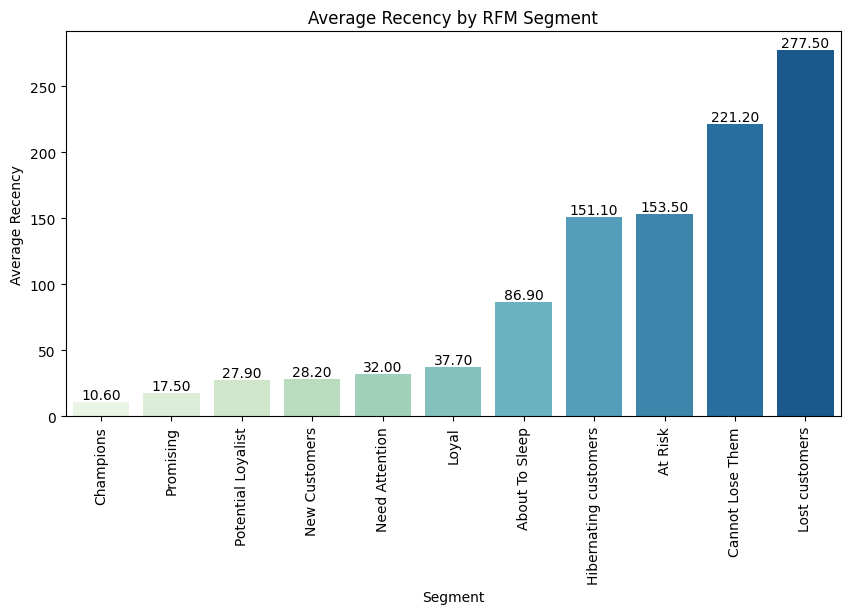

In [ ]:
fig, ax = plt.subplots(1, figsize = (10,5))

r_chart = sns.barplot(data = segmentation_data.sort_values('avg_recency'),
                      x = 'Segment',
                      y = 'avg_recency',
                      palette = 'GnBu'
                      )
r_chart.set_title('Average Recency by RFM Segment')
r_chart.set_xlabel('Segment')
r_chart.set_ylabel('Average Recency')
plt.xticks(rotation = 90)


for p in r_chart.patches:
    r_chart.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')
plt.show()


- Segment with the most recent purchase date: Champions(10.6), Promising(17.5), Potential(27.9)
- Segment that havce not returned to by for a long time: Lost customer(277.5), Cannot Lose Them(221.2), At Risk(153.5)

#### Visualize Average Frequency by RFM Segment

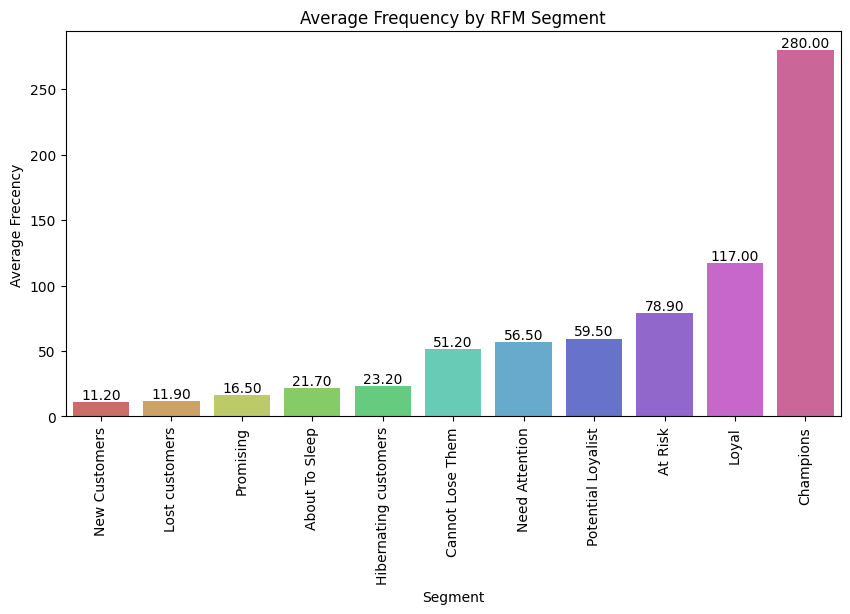

In [ ]:
fig, ax = plt.subplots(1, figsize = (10,5))

r_chart = sns.barplot(data = segmentation_data.sort_values('avg_frequency'),
                      x = 'Segment',
                      y = 'avg_frequency',
                      palette = 'hls'
                      )
r_chart.set_title('Average Frequency by RFM Segment')
r_chart.set_xlabel('Segment')
r_chart.set_ylabel('Average Frecency')
plt.xticks(rotation = 90)


for p in r_chart.patches:
    r_chart.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')
plt.show()

- Most frequency purchase segments: Champions(280), Loyal(117), At Risk(78,9)
- The lowest number of orders: New Customers(11,2), Lost Customer(11.9), Promising(16.5)
- The frequency of Champions is 25 times higher than that of the New Customers segment

#### Visualize Total Cost by RFM Segment


In [ ]:
segmentation_data[['Segment','sum_monetory']].sort_values(by = 'sum_monetory', ascending = False)

,Segment,sum_monetory
3,Champions,5462794.0
6,Loyal,974973.7
1,At Risk,632903.7
7,Need Attention,341270.9
10,Promising,326704.2
4,Hibernating customers,323294.8
9,Potential Loyalist,296324.3
2,Cannot Lose Them,294868.1
5,Lost customers,74230.2
8,New Customers,63949.4


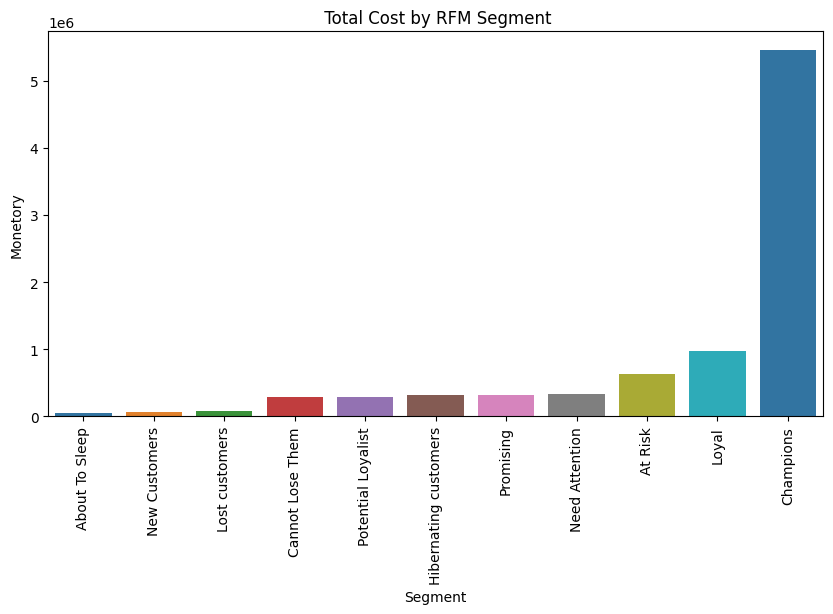

In [ ]:
fig, ax0 = plt.subplots(1, figsize = (10,5))

r_chart = sns.barplot(data = segmentation_data.sort_values('sum_monetory'),
                      x = 'Segment',
                      y = 'sum_monetory',
                      palette = 'tab10'
                      )
r_chart.set_title(' Total Cost by RFM Segment')
r_chart.set_xlabel('Segment')
r_chart.set_ylabel('Monetory')
plt.xticks(rotation = 90)

plt.show()

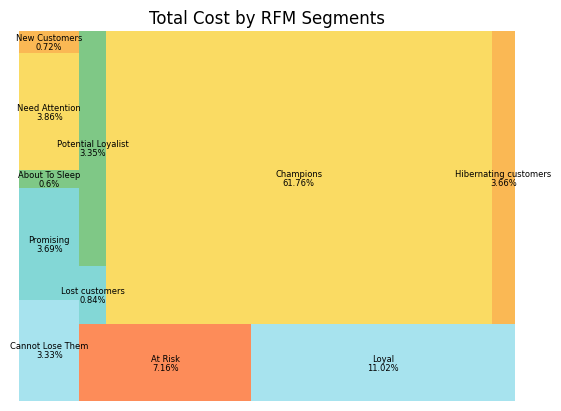

In [ ]:
colors = ['#91DCEA', '#64CDCC', '#5FBB68',
          '#F9D23C', '#F9A729', '#FD6F30']
#
count_map1 = sq.plot(sizes=segmentation_data['rate_monetory'],
                    label=segmentation_data['Segment'],
                    alpha=.8,
                    text_kwargs={'fontsize':6},
                    value=[f'{x}%' for x in segmentation_data['rate_monetory']],
                    color = colors)
plt.title('Total Cost by RFM Segments')
plt.axis("off")
plt.show()

- Segment with the highest total cost revenue: Champions(5462794.0 dollars, equivalent to 61,76%) and Loyal segment(974973.7 dollars and equivalent to 11.02%)
- Segment with the lowest total cost: About To Sleep(53231.2 dollars, equivaltent to 0.6%), New Customers(63949.4 dollars, equivalent to 0.72%)


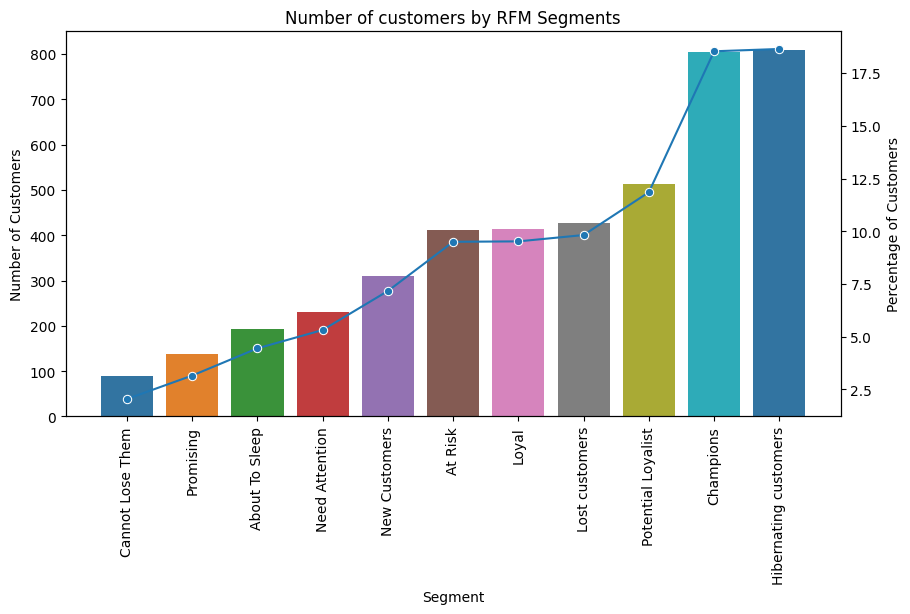

In [ ]:
fig, ax1 = plt.subplots(1,figsize = (10,5))
ax2 = ax1.twinx()
sns.barplot(data= segmentation_data,
            x='Segment',
            y= 'cus_count',
            palette='tab10',
            ax=ax1)

sns.lineplot(data = segmentation_data.sort_values('rate_customer'),
             x = 'Segment',
             y = 'rate_customer',
             marker = 'o',)
ax1.set(xlabel='Segment', ylabel='Number of Customers')
ax2.set(ylabel='Percentage of Customers')
ax1.tick_params(axis='x', rotation=90)
plt.title('Number of customers by RFM Segments')
plt.show()

- The number of Hibernating customers is highest with 809 customers and 18.64%. Beside, Champions have 804 customers and 18.53%
- Cannot Lose Them segment have the lowest customer even so rate customer with 89 customers and 2.05%

**Recommendation**:
In this Christmas - New Year marketing campaign, SuperStore needs to prioritize their efforts to promote the Potential Loyalist group to become Loyal and Champions, and find ways to reconnect with customers group which have the most purchase and quantity in the segment group.

## 3.5 Loyal customer, Non Loyal customer

In [ ]:
RFM_final['Loyal_list'] = RFM_final['Segment'].apply(lambda x: 'Loyal' if (x == 'Loyal' or x == 'Potential Loyalist') else 'Non Loyal')
RFM_final.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM,Segment,RFM Score,Loyal_list
0,12346.0,325,1,77183.60,1,1,5,115,Cannot Lose Them,115,Non Loyal
1,12347.0,1,182,4310.00,5,5,5,555,Champions,555,Non Loyal
2,12348.0,74,27,1595.64,2,2,4,224,At Risk,224,Non Loyal
3,12349.0,18,73,1757.55,4,4,4,444,Loyal,444,Loyal
4,12350.0,309,17,334.40,1,2,2,122,Hibernating customers,122,Non Loyal


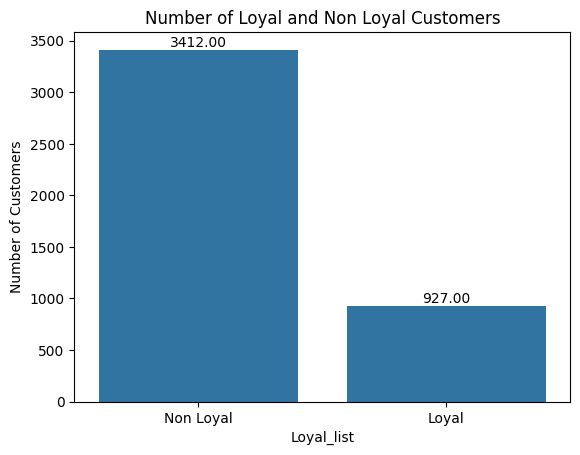

In [ ]:
loyal_chart =  sns.countplot(RFM_final, x="Loyal_list")
loyal_chart.set_ylabel('Number of Customers')
plt.title('Number of Loyal and Non Loyal Customers')

for p in loyal_chart.patches:
    loyal_chart.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')

In [ ]:
df = RFM_final.merge(final_retail, how = 'left', on = 'CustomerID')
data = df[['CustomerID','InvoiceNo','InvoiceDate','Quantity','UnitPrice','cost','Country','Cancel_list','Segment','Loyal_list','Year','Month']]
data.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,cost,Country,Cancel_list,Segment,Loyal_list,Year,Month
0,12346.0,541431,2011-01-18 10:01:00,74215,1.04,77183.6,United Kingdom,False,Cannot Lose Them,Non Loyal,2011,1
1,12347.0,537626,2010-12-07 14:57:00,12,2.10,25.2,Iceland,False,Champions,Non Loyal,2010,12
2,12347.0,537626,2010-12-07 14:57:00,4,4.25,17.0,Iceland,False,Champions,Non Loyal,2010,12
3,12347.0,537626,2010-12-07 14:57:00,12,3.25,39.0,Iceland,False,Champions,Non Loyal,2010,12
4,12347.0,537626,2010-12-07 14:57:00,36,0.65,23.4,Iceland,False,Champions,Non Loyal,2010,12


In [ ]:
segment_data = data.groupby(['Segment']).agg(
    Sales_sum=('cost', 'sum'),
    Sales_mean=('cost', 'mean'),
    Invoice_ord=('InvoiceNo', 'nunique'),
    Quantity = ('Quantity','sum')
).reset_index()
segment_data.sort_values(by = 'Sales_sum', ascending = False, inplace = True)
segment_data

,Segment,Sales_sum,Sales_mean,Invoice_ord,Quantity
3,Champions,5462794.030,24.268514,9672,3099201
6,Loyal,974973.720,20.182031,2174,581813
1,At Risk,632903.660,19.469765,1354,389007
7,Need Attention,341270.890,26.125001,888,216825
10,Promising,326704.170,144.559367,407,175911
4,Hibernating customers,323294.751,17.206597,1292,198933
9,Potential Loyalist,296324.311,9.693938,1277,184254
2,Cannot Lose Them,294868.061,64.720821,272,166577
5,Lost customers,74230.220,14.690327,478,40627
8,New Customers,63949.420,18.376270,446,51755


### Loyal Customer

In [ ]:
potential = data.query('Segment == "Potential Loyalist" or Segment == "Loyal" or Segment == "Champions"')
potential.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,cost,Country,Cancel_list,Segment,Loyal_list,Year,Month
1,12347.0,537626,2010-12-07 14:57:00,12,2.10,25.2,Iceland,False,Champions,Non Loyal,2010,12
2,12347.0,537626,2010-12-07 14:57:00,4,4.25,17.0,Iceland,False,Champions,Non Loyal,2010,12
3,12347.0,537626,2010-12-07 14:57:00,12,3.25,39.0,Iceland,False,Champions,Non Loyal,2010,12
4,12347.0,537626,2010-12-07 14:57:00,36,0.65,23.4,Iceland,False,Champions,Non Loyal,2010,12
5,12347.0,537626,2010-12-07 14:57:00,12,1.25,15.0,Iceland,False,Champions,Non Loyal,2010,12


In [ ]:
segment_potential = potential.groupby(['Segment','Year','Month']).agg(
    Sales_sum=('cost', 'sum'),
    Sales_mean=('cost', 'mean'),
    Invoice_ord=('InvoiceNo', 'nunique'),
    Quantity = ('Quantity','sum')
).reset_index()
segment_potential['Avg_order_value'] = (segment_potential['Sales_sum']/segment_potential['Invoice_ord']).round(2)
segment_potential['OPU'] = (segment_potential['Invoice_ord']/segment_potential['Quantity']*100).round(3) #OPU - Order per Unit: tần suất đơn hàng trên sp
segment_potential.head()

,Segment,Year,Month,Sales_sum,Sales_mean,Invoice_ord,Quantity,Avg_order_value,OPU
0,Champions,2010,12,369393.54,26.253983,750,195416,492.52,0.384
1,Champions,2011,1,312513.40,25.521715,519,179900,602.15,0.288
2,Champions,2011,2,267823.45,26.298453,482,155670,555.65,0.310
3,Champions,2011,3,361539.61,24.921735,652,209868,554.51,0.311
4,Champions,2011,4,238588.03,20.037627,568,150877,420.05,0.376


#### Sales and Order value

In [ ]:
top_customer = potential.groupby(['CustomerID']).agg(
    Sales_sum=('cost', 'sum'),
    Invoice_ord=('InvoiceNo', 'nunique'),
    Quantity = ('Quantity','sum')
).reset_index()
top_customer.sort_values(by = 'Sales_sum', ascending = False, inplace = True)
top_customer.head(10)

,CustomerID,Sales_sum,Invoice_ord,Quantity
683,14646.0,280206.02,74,197491
1676,18102.0,259657.30,60,64124
1496,17450.0,194390.79,46,69973
765,14911.0,143711.17,201,80490
25,12415.0,124914.53,21,77670
530,14156.0,117193.58,55,57764
1510,17511.0,91062.38,31,64549
1089,16029.0,80613.24,63,39964
1277,16684.0,66653.56,28,50255
401,13694.0,65039.62,50,63312


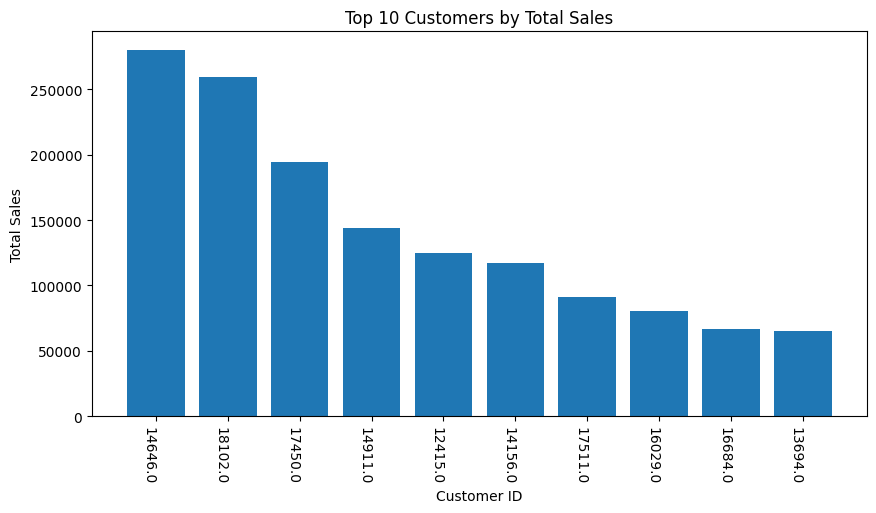

In [ ]:
plt.figure(figsize=(10, 5))

plt.bar(top_customer['CustomerID'].head(10), top_customer['Sales_sum'].head(10))
plt.xlabel("Customer ID")
plt.ylabel("Total Sales")
plt.title("Top 10 Customers by Total Sales")
plt.xticks(rotation=-90, ha='right')
plt.show()

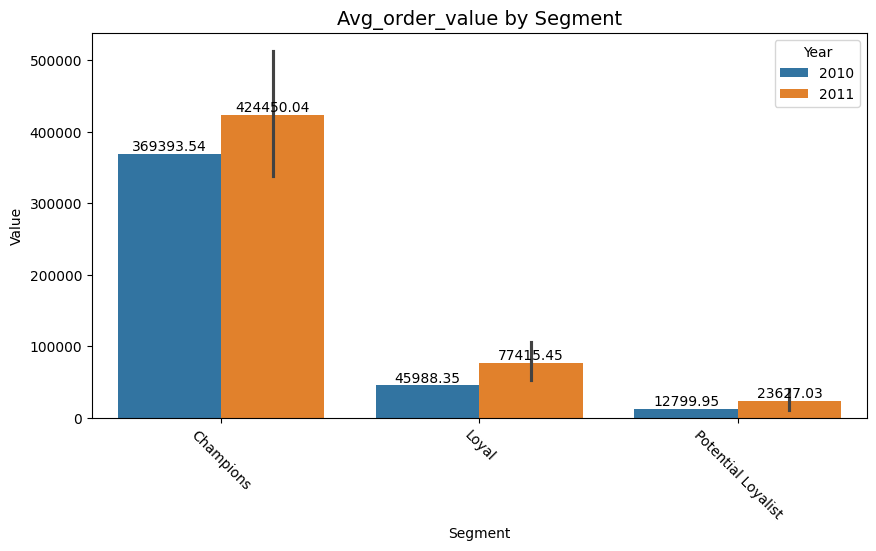

In [ ]:
fig, ax0 = plt.subplots(1, figsize=(10,5))
###Set plot for Avg_order_value
sns.barplot(data=segment_potential, x='Segment', y='Sales_sum',hue = 'Year',palette='tab10')
ax0.set_title('Avg_order_value by Segment', fontsize=14)
ax0.set_xlabel('Segment')
ax0.set_ylabel('Value')
ax0.tick_params(axis='x', rotation=-45)
for p in ax0.patches:
    if p.get_height() > 0:
      ax0.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')


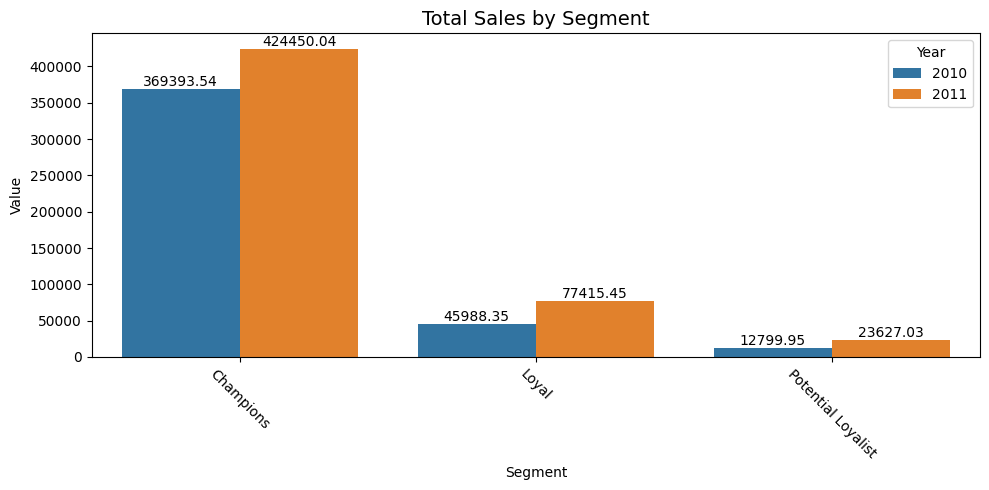

In [ ]:
fig, ax0 = plt.subplots(1, figsize=(10, 5))

# Set plot for Total Sale
sns.barplot(data=segment_potential, x='Segment', y='Sales_sum', hue='Year', palette='tab10', ci=None)
ax0.set_title('Total Sales by Segment', fontsize=14)
ax0.set_xlabel('Segment')
ax0.set_ylabel('Value')
ax0.tick_params(axis='x', rotation=-45)

# Add annotations for bars
for p in ax0.patches:
    if p.get_height() > 0:
        ax0.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')

# Show the plot
plt.tight_layout()
plt.show()

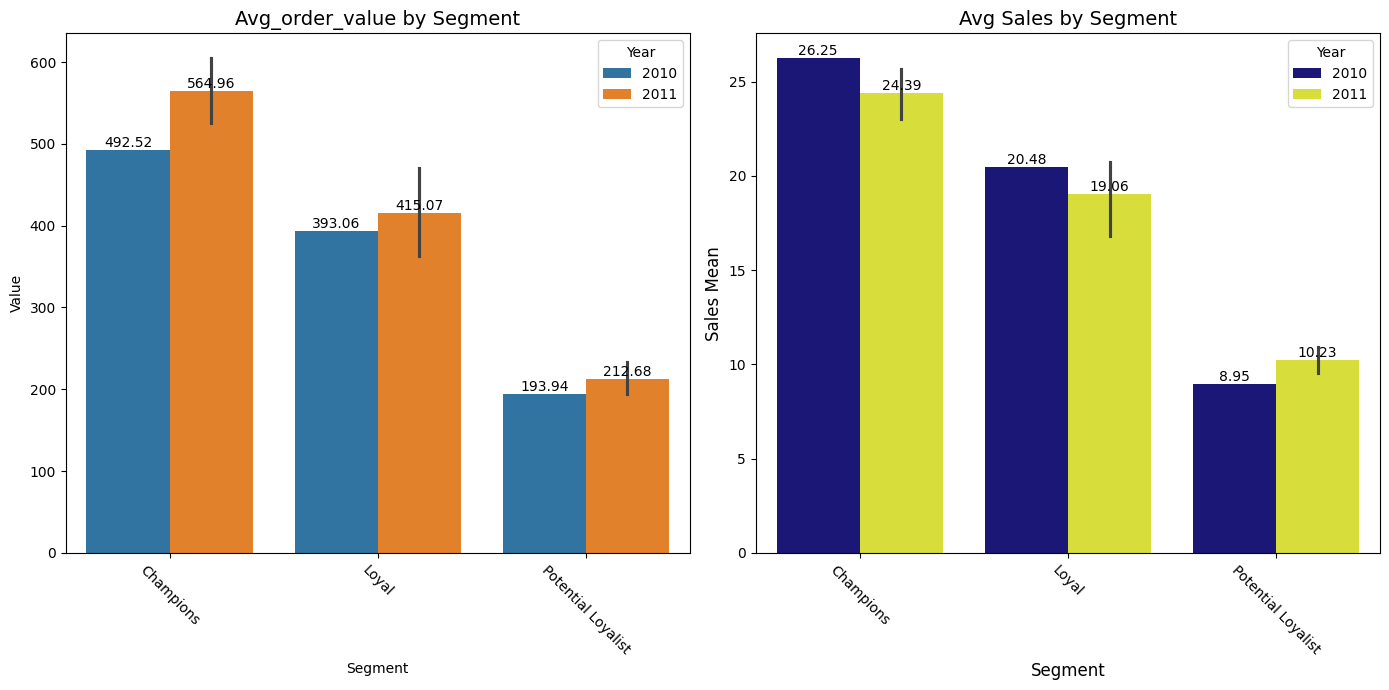

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14,7), sharey=False)
###Set plot for Avg_order_value
sns.barplot(data=segment_potential, x='Segment', y='Avg_order_value',hue = 'Year',palette='tab10', ax=ax0)
ax0.set_title('Avg_order_value by Segment', fontsize=14)
ax0.set_xlabel('Segment')
ax0.set_ylabel('Value')
ax0.tick_params(axis='x', rotation=-45)
for p in ax0.patches:
    if p.get_height() > 0:
      ax0.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')


###Set plot for Avg Sales by Segment
sns.barplot(data=segment_potential, x='Segment', y='Sales_mean',hue = 'Year', palette='plasma', ax=ax1)
ax1.set_title('Avg Sales by Segment', fontsize=14)
ax1.set_xlabel('Segment', fontsize=12)
ax1.set_ylabel('Sales Mean', fontsize=12)
ax1.tick_params(axis='x', rotation=-45)
for p in ax1.patches:
    if p.get_height() > 0:
      ax1.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')

plt.tight_layout()
plt.show()

##### Insights and Recommendations
1. Performance Segment:
  - Champions Segment increased modestly from 366,393.54 to 424,450.01 (2010-2011).
  - Loyal Segment growth from 45,988.35 (2010) to 77,415.45 (2011) shows positive momentum in this group.
  - Potential Loyalist Segment grew from 12,799.95 (2010) to 23,627.03 (2011).

  **Recommend**: Focus on Champions and Loyal Segments with loyalty programs, exclusive offers, and personalized experiences to maintain engagement and ensure continued revenue contribution. Enhance campaign to promote more in Potential Loyalist group.


2. Average order values increased almost all the time from 2010 to 2011.
  - Champions have the most highest value between 2010 and 2011.
  - Potential Loyalist grow up slightly from 193.93 to 234.12.

  **Recommend**: That is usually a positive sign. Marketing and Sale team should to focus on this groups.
3. Average Sales decreased almost all the time beside Potential Loyalist.
  - Champions still have the most highest Sales Mean with 26.25 however this segment drop slightly to 24.14 in 2011.
  - Meanwhile Potential Loyalist grew up from 8.95 to 9.73 from 2010 to 2011.
  
  **Recommend**: Company should to run campaign to attract this customers. If this trend continues, it could lead to a decrease in overall sales as customers do not return to buy as often.

**Conclude:** Although the average sale is down, the value of each order is high. Customers tend to buy fewer products but the value of each product is high. It is necessary to add more products at average prices or launch promotions to attract customers to come back to shop. In addition, the company should launch promotions as well as reduce the value of each order to be more balanced.


#### Total Quantity and Order Per Unit by Segment

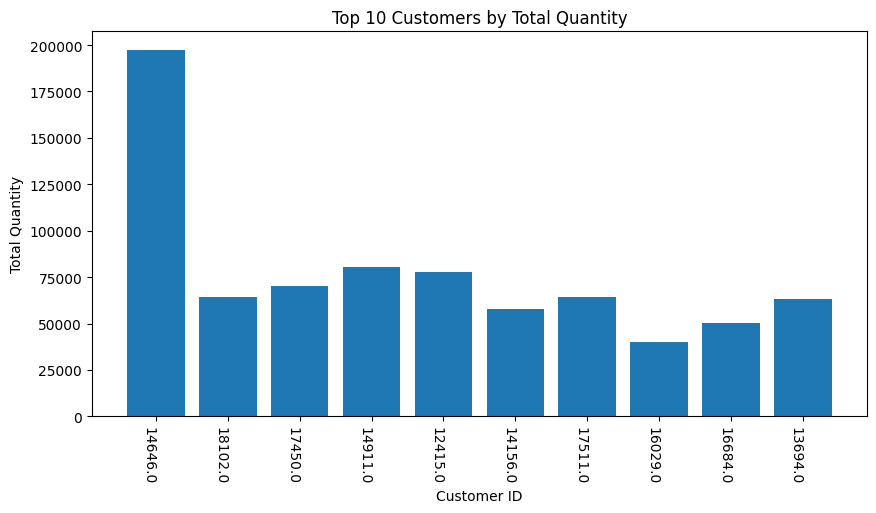

In [ ]:
#
plt.figure(figsize=(10, 5))

plt.bar(top_customer['CustomerID'].head(10), top_customer['Quantity'].head(10))
plt.xlabel("Customer ID")
plt.ylabel("Total Quantity")
plt.title("Top 10 Customers by Total Quantity")
plt.xticks(rotation=-90, ha='right')
plt.show()

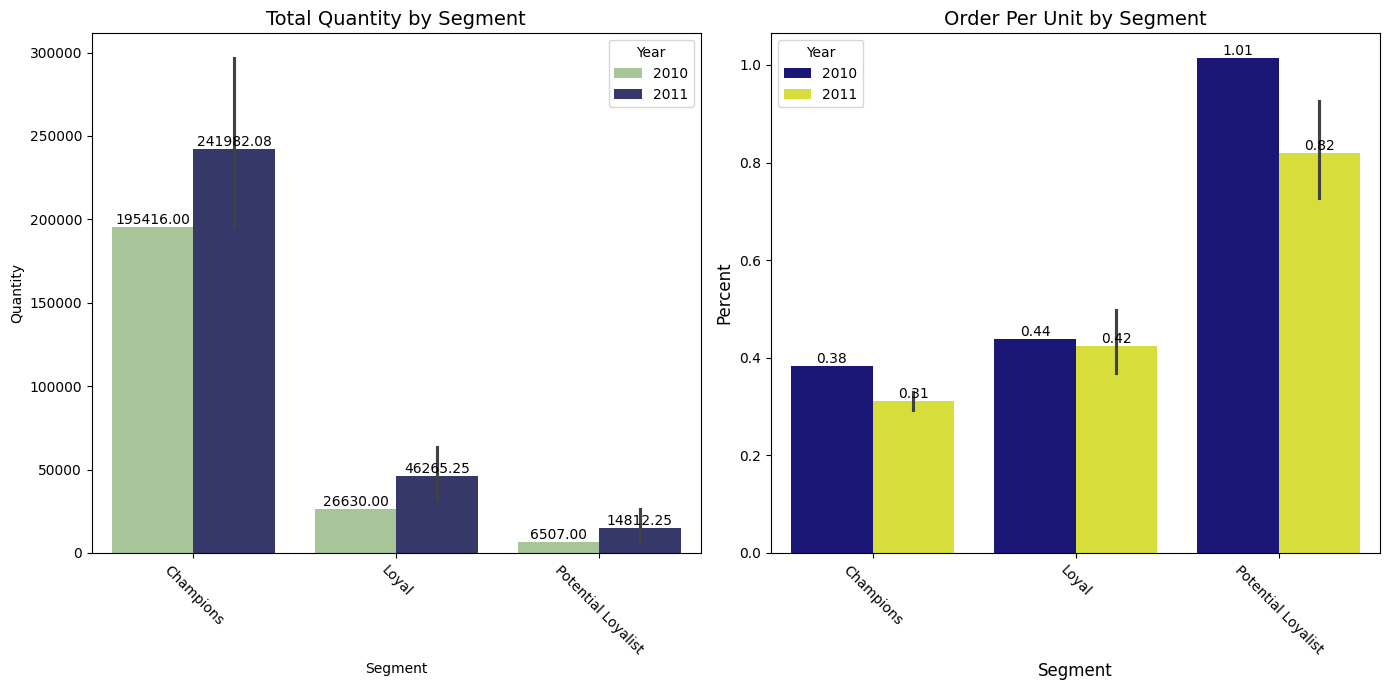

In [ ]:
# Visualize Total Quantity and Order Per Unit
fig, (ax0,ax1) = plt.subplots(1,2, figsize = (14,7),sharey = False)

### Total Quantity
sns.barplot(data= segment_potential, x='Segment',y= 'Quantity',hue = 'Year', palette='crest', ax=ax0)
ax0.set_title('Total Quantity by Segment', fontsize=14)
ax0.set_xlabel('Segment')
ax0.set_ylabel('Quantity')
ax0.tick_params(axis='x', rotation=-45)
for p in ax0.patches:
    if p.get_height() > 0:
      ax0.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')


### Order Per Unit
sns.barplot(data=segment_potential, x='Segment', y='OPU',hue = 'Year', palette='plasma', ax=ax1)  # Use ax1 here!
ax1.set_title('Order Per Unit by Segment', fontsize=14)
ax1.set_xlabel('Segment', fontsize=12)
ax1.set_ylabel('Percent', fontsize=12)
ax1.tick_params(axis='x', rotation=-45)
for p in ax1.patches:
    if p.get_height() > 0:
      ax1.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')
plt.tight_layout()
plt.show()

##### Insights and Recommendations
1. Total Quantity increased sharply over the years (2010-2011)
- Champions: From 195,416 (2010) to 2,903,785 (2011) – a huge increase.
- Loyal dramatically increased from 26630 to 555183.
- Potential Loyalist rose sharply from 6507 to 177747

**Recommend**
- An increasing trend in total Quantity is a good sign that the business is effectively attracting customers.
- Potential Loyalist has low purchase volume, increase incentives and customer care to retain them.
- Need to expand strategy to other segments to reduce risk and grow sustainably.

2. Order Per Unit decreased slightly during period year
- Potential Loyalist decline dramatically from 1.01% to 0.68%
- Champions and Loyal drop minimally 0.38% to 0.31% and 0.44% to 0.37%

**Recommned**
 - Customers buying more products in the same order can bring more revenue to the company but this reduces customer interaction when combining many orders like that.
 - It is necessary to have more promotions as well as increase customer interaction with more products.
 - Need to optimize operations and delivery processes to better handle large orders.
 - Beside, ensure that profit margins are not excessively reduced as customers switch to bulk buying behavior.

### Non Loyal Customer

In [ ]:
non_potential = data.query('Segment != "Potential Loyalist" and Segment != "Loyal" and Segment != "Champions"')
non_potential.head()

,CustomerID,InvoiceNo,InvoiceDate,Quantity,UnitPrice,cost,Country,Cancel_list,Segment,Loyal_list,Year,Month
0,12346.0,541431,2011-01-18 10:01:00,74215,1.04,77183.6,United Kingdom,False,Cannot Lose Them,Non Loyal,2011,1
183,12348.0,539318,2010-12-16 19:09:00,72,0.55,39.6,Finland,False,At Risk,Non Loyal,2010,12
184,12348.0,539318,2010-12-16 19:09:00,72,0.55,39.6,Finland,False,At Risk,Non Loyal,2010,12
185,12348.0,539318,2010-12-16 19:09:00,24,0.55,13.2,Finland,False,At Risk,Non Loyal,2010,12
186,12348.0,539318,2010-12-16 19:09:00,24,0.55,13.2,Finland,False,At Risk,Non Loyal,2010,12


In [ ]:
seg_non_potential = non_potential.groupby(['Segment','Year']).agg(
    Sales_sum=('cost', 'sum'),
    Sales_mean=('cost', 'mean'),
    Invoice_ord=('InvoiceNo', 'nunique'),
    Quantity = ('Quantity','sum')
).reset_index()
seg_non_potential['Avg_order_value'] = (seg_non_potential['Sales_sum']/seg_non_potential['Invoice_ord']).round(2)
seg_non_potential['OPU'] = (seg_non_potential['Invoice_ord']/seg_non_potential['Quantity']*100).round(3) #OPU - Order per Unit: tần suất đơn hàng trên sp
seg_non_potential

,Segment,Year,Sales_sum,Sales_mean,Invoice_ord,Quantity,Avg_order_value,OPU
0,About To Sleep,2010,1145.500,19.415254,9,1160,127.28,0.776
1,About To Sleep,2011,52085.670,12.587160,267,36416,195.08,0.733
2,At Risk,2010,49162.410,15.253618,124,28825,396.47,0.430
3,At Risk,2011,583741.250,19.933795,1230,360182,474.59,0.341
4,Cannot Lose Them,2010,27508.620,28.301049,65,15878,423.21,0.409
5,Cannot Lose Them,2011,267359.441,74.598058,207,150699,1291.59,0.137
6,Hibernating customers,2010,21610.280,15.315578,97,12774,222.79,0.759
7,Hibernating customers,2011,301684.471,17.360138,1195,186159,252.46,0.642
8,Lost customers,2010,14848.090,12.530034,89,7889,166.83,1.128
9,Lost customers,2011,59382.130,15.352154,389,32738,152.65,1.188


#### Sales and Order value

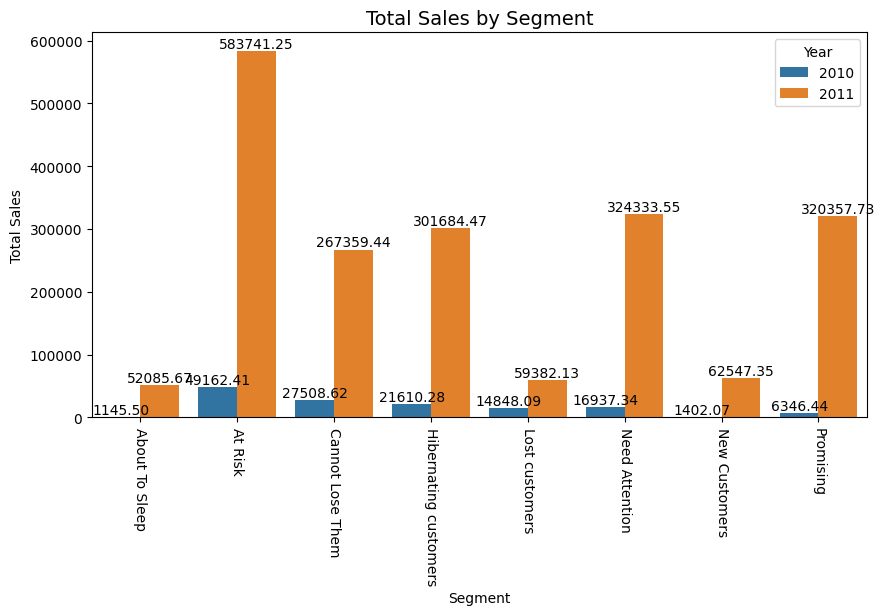

In [ ]:
# Visualize Total Quantity and Order Per Unit
fig, ax0 = plt.subplots(1, figsize = (10,5))

### Total Quantity
sns.barplot(data= seg_non_potential, x='Segment',y= 'Sales_sum',hue = 'Year', palette='tab10', ax=ax0)
ax0.set_title('Total Sales by Segment', fontsize=14)
ax0.set_xlabel('Segment')
ax0.set_ylabel('Total Sales')
ax0.tick_params(axis='x', rotation=-90)
for p in ax0.patches:
    if p.get_height() > 0:
      ax0.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')

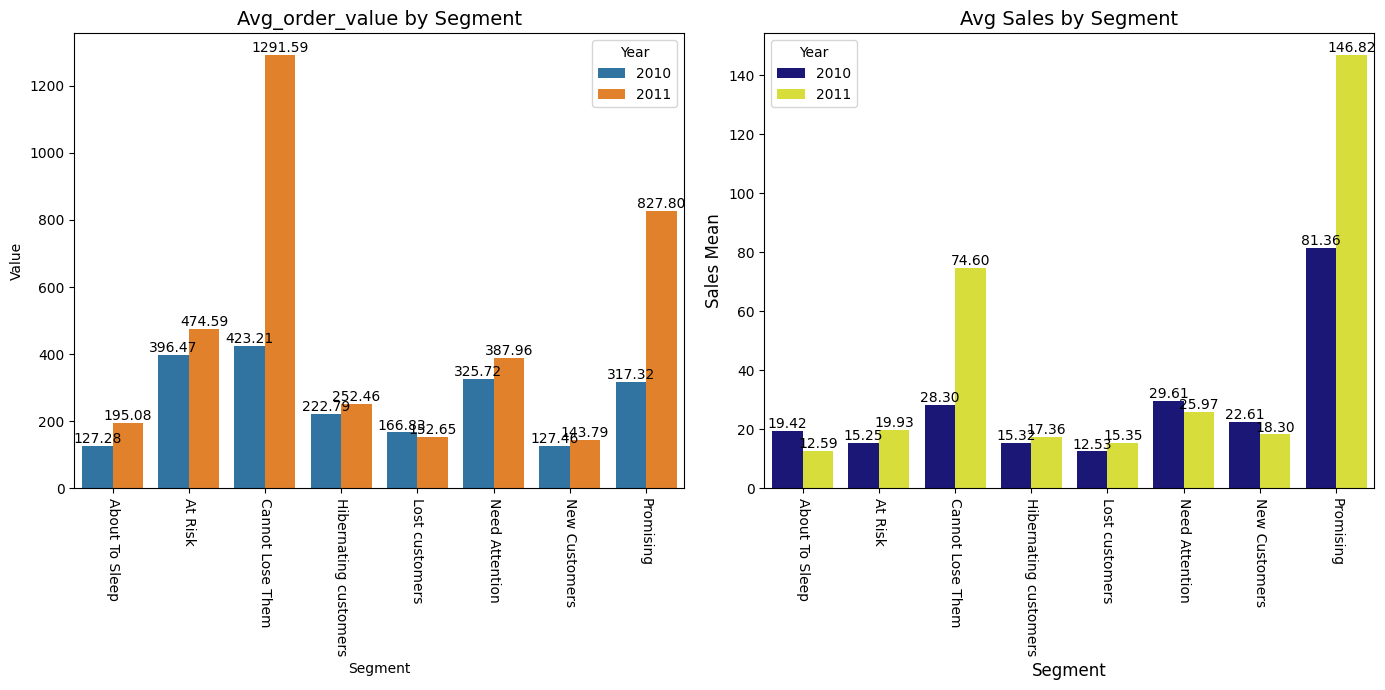

In [ ]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(14,7), sharey=False)
###Set plot for Avg_order_value
sns.barplot(data=seg_non_potential, x='Segment', y='Avg_order_value',hue = 'Year',palette='tab10', ax=ax0)
ax0.set_title('Avg_order_value by Segment', fontsize=14)
ax0.set_xlabel('Segment')
ax0.set_ylabel('Value')
ax0.tick_params(axis='x', rotation=-90)
for p in ax0.patches:
    if p.get_height() > 0:
      ax0.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')


###Set plot for Avg Sales by Segment
sns.barplot(data=seg_non_potential, x='Segment', y='Sales_mean',hue = 'Year', palette='plasma', ax=ax1)
ax1.set_title('Avg Sales by Segment', fontsize=14)
ax1.set_xlabel('Segment', fontsize=12)
ax1.set_ylabel('Sales Mean', fontsize=12)
ax1.tick_params(axis='x', rotation=-90)
for p in ax1.patches:
    if p.get_height() > 0:
      ax1.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')

plt.tight_layout()
plt.show()

##### Insights and Recommendations
1. Total Sales by Segment
  - Massive Growth in Total Sales Across Segments (2011):
    - At Risk: From 79,162.41 (2010) to 583,741.25 (2011)—a huge increase. However, these customers are still at risk, so continuous attention is crucial.
    - Cannot Lose Them: Sales grew nearly tenfold, from 27,508.62 (2010) to 267,359.44 (2011). This segment clearly holds immense potential, reinforcing their critical role in revenue generation.
  - Total Sale of At Risk, Need Attention, Promising, Hibernating customers is larger than total sale of Potential Loyalist in 2010-2011. Can further evaluate the segmentation of customer groups that can become Loyal Segments
2. Avg_order_value by Segment
  - Promising Segment: The average order value jumped significantly from 317.32 (2010) to 827.80 (2011). This indicates that customers in this segment may be responding well to higher-value products or pricing strategies.
  - Cannot Lose Them Segment: Although this segment only appears in 2011 with an extremely high avg_order_value of 1291.59, its introduction could represent a strategy to identify and retain high-value customers.
  - Need Attention & At Risk Segments: Both segments experienced steady growth in avg_order_value, suggesting a positive response from these customers to improved product offerings or pricing strategies.
  - Hibernating, Lost, and About To Sleep Segments: These segments saw modest increases, signaling that while they are engaging more with higher-value purchases, they remain less responsive compared to other segments.

3. Avg Sales by Segment
  - Promising Segment: Sales mean skyrocketed from 81.36 (2010) to 146.82 (2011), reflecting an increase in purchasing activity.

  - Cannot Lose Them Segment: The sales mean rose dramatically from 28.30 (2010) to 74.60 (2011), reinforcing the importance of this high-value group.

  - At Risk Segment: Despite avg_order_value increasing, sales mean decreased from 19.93 (2010) to 15.25 (2011), indicating a decline in purchase frequency or basket size.

  - About To Sleep & New Customers: Both experienced a drop in sales mean, suggesting reduced purchasing activity, which could indicate disengagement.

**Recommendations**
1. Strengthen Loyalty for High-Potential Segments
  - Prioritize Cannot Lose Them and Promising Segments with personalized offers, loyalty programs, and premium experiences.
  - Implement cross-sell and upsell strategies to maximize revenue from these engaged groups.
2. Focus on High-Potential Segments
  - Promissing Segment:
    - PLeverage their growth momentum by introducing loyalty programs or exclusive offers.
    - Expand product to targeted at this segment's preferences
  - Cannot Lose Them Segment:
    - Invest in personalized marketing stratedgies and prioritize customer service for this group
3. Strengthen Retention Strategies for Hibernating & Lost Customers
  - Offer campaigns aimed at reactivating these segments, discounts or exclusive sales.
  - Analyze their purchasing history to identify products that previously resonated with them and highlight these in campaigns.
4. Re-engage Declining Segments
  - Investigate reasons for declining sales mean through surveys or feedback campaigns.
  - Reconnect with customers through personalized offers or incentives to reactivate engagement.

#### Total Quantity and OPU by Segment

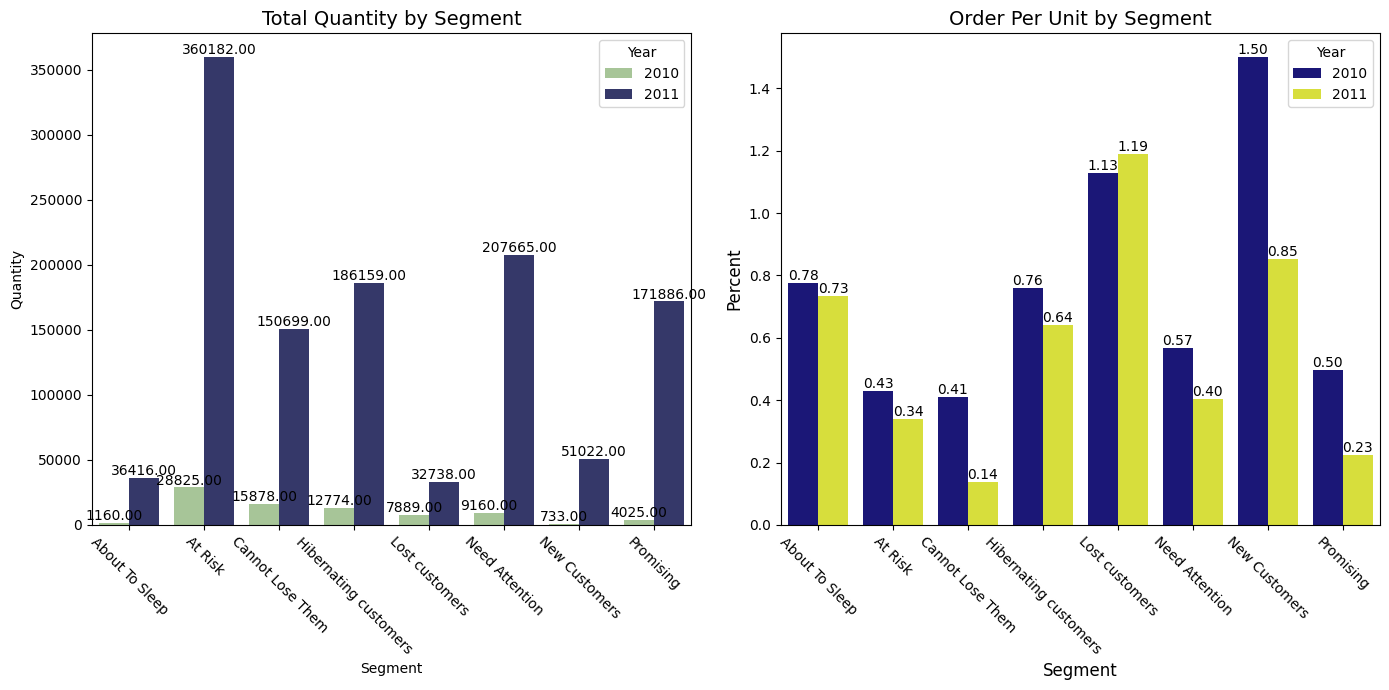

In [ ]:
# Visualize Total Quantity and Order Per Unit
fig, (ax0,ax1) = plt.subplots(1,2, figsize = (14,7),sharey = False)

### Total Quantity
sns.barplot(data= seg_non_potential, x='Segment',y= 'Quantity',hue = 'Year', palette='crest', ax=ax0)
ax0.set_title('Total Quantity by Segment', fontsize=14)
ax0.set_xlabel('Segment')
ax0.set_ylabel('Quantity')
ax0.tick_params(axis='x', rotation=-45)
for p in ax0.patches:
    if p.get_height() > 0:
      ax0.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')


### Order Per Unit
sns.barplot(data=seg_non_potential, x='Segment', y='OPU',hue = 'Year', palette='plasma', ax=ax1)  # Use ax1 here!
ax1.set_title('Order Per Unit by Segment', fontsize=14)
ax1.set_xlabel('Segment', fontsize=12)
ax1.set_ylabel('Percent', fontsize=12)
ax1.tick_params(axis='x', rotation=-45)
for p in ax1.patches:
    if p.get_height() > 0:
      ax1.annotate(format(p.get_height(), '.2f'),
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 5),
                     textcoords='offset points')
plt.tight_layout()
plt.show()

##### Insights and Recommendations
1. Significant Growth in Total Quantity:
  - All customer segments show a notable increase in total quantity from 2010 to 2011, particularly:
  - At Risk: From 28,825 to 360,182 (over 10x growth).
  - Need Attention and Promising: Both segments also exhibit large jumps in order volumes.

2. Order Per Unit by Segment:
  - The Lost Customers segment consistently has the highest "order per unit" ratio, increasing from 1.13 (2010) to 1.19 (2011), suggesting effective retention or focused engagement strategies for this group.
  - The At Risk and Cannot Lose Them segments see a decrease in the "order per unit" ratio.
  - New Customers experienced a significant drop in their order-per-unit ratio from 1.50 in 2010 to 0.85 in 2011

**Recommendations**:
1. Focus on Retaining High-Value Segments
  - Target At Risk and Cannot Lose Them customers with personalized promotions or loyalty incentives to address the declining order-per-unit trend.
  - Use tailored communication to re-engage Need Attention customers who show growth potential.
2. Improve Efficiency for New Customers
  - Implement onboarding campaigns or early-stage rewards to increase engagement and orders-per-unit for New Customers.
3. Leverage Insights from Top Performers
  - Investigate what works well with Lost Customers who have the highest efficiency, and apply similar techniques to lower-performing groups.